##Support Vector Machine 

# ***Modules***

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
from scipy.io import loadmat
from sklearn import svm


# Read The Data

In [2]:
data1 = loadmat('/content/ex6data3.mat')

# Read the data as x and y


In [3]:
y1 = data1['y']
X1 = data1['X']


# Print the x data

In [ ]:
print(X1)

Print Y 

In [ ]:
print(y1)

# Function to plot the data in to terms

In [7]:
def plotData(X, y ,S):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(X[pos,0], X[pos,1], s=S, c='c', marker='x', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=S, c='r', marker='o', linewidths=1)


Ploting the data 

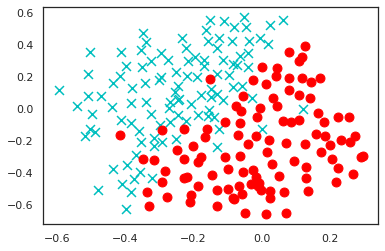

In [8]:
plotData(X1,y1,80)


Function to plot the result of the svm

In [9]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plotData(X, y,6)
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='y', marker='|', s=100, linewidths=5)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)


Using Linear SVM Method on this data 

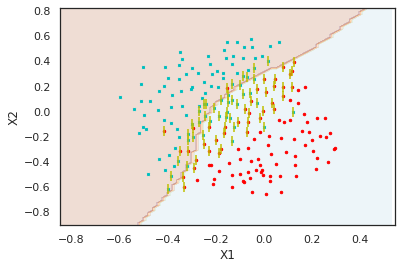

Number of support vectors:  78


In [22]:
clf2 = svm.SVC(C=1.0, kernel='poly', degree=3, gamma=10)
clf2.fit(X1, y1.ravel())
plot_svc(clf2, X1, y1)


In [23]:
print(f"The model accuracy is {round(clf2.score(X1, y1.ravel())*100,2)}%")

The model accuracy is 88.15%
